In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")  # Replace with actual path


In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Inspect the data
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Select the features we want to use for clustering (Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans
# Elbow Method to find optimal number of clusters
wcss = []  # List to store inertia values (WCSS) for each k
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS


C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

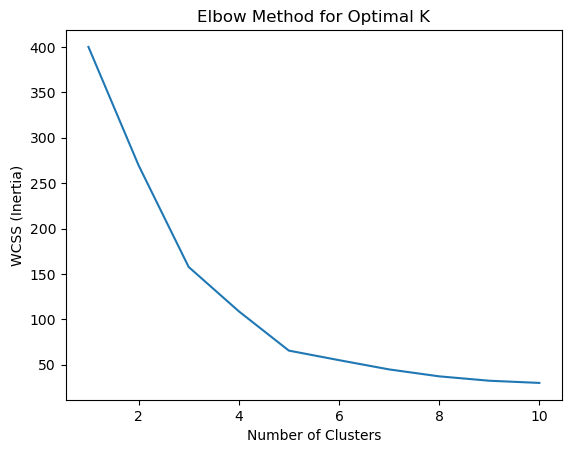

In [11]:
import matplotlib.pyplot as plt
# Plot the Elbow Method to visualize the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [12]:

# After inspecting the elbow plot, choose the optimal k (e.g., k=5 from the plot)
optimal_k = 5
# Apply KMeans with the optimal k (k=5)
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Output the inertia for the chosen k
print(f"Inertia for optimal k={optimal_k}: {kmeans.inertia_}")


C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Inertia for optimal k=5: 65.5684081557168


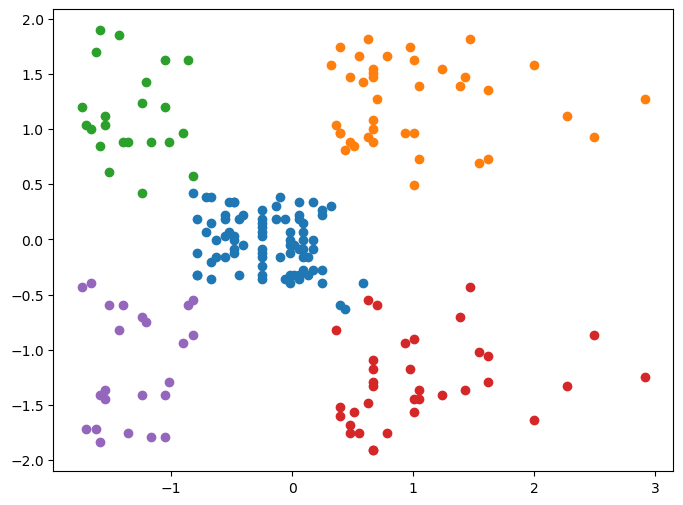

In [13]:
# Visualize the clusters (using the first two features: Annual Income and Spending Score)
plt.figure(figsize=(8,6))
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i+1}')

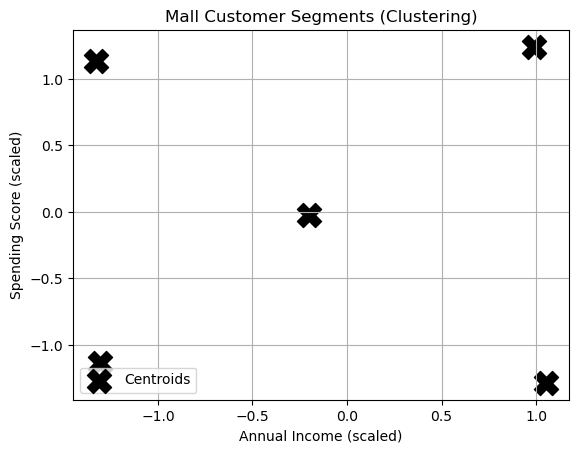

In [14]:
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Mall Customer Segments (Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()